# "Fun with Loot Boxes" Lab

> Author: Caroline Schmitt, Matt Brems

### Scenario:

You're an analyst for [Zynga](https://en.wikipedia.org/wiki/Zynga), a gaming studio working on an event for an MMO (massively multiplayer online) game. This event is going to include **loot boxes**.

<img src="https://vignette.wikia.nocookie.net/2007scape/images/0/06/Culinaromancer%27s_chest.png/revision/latest?cb=20180403231423" alt="drawing" width="150"/> 

A loot box is basically a treasure chest in a game. This loot box can be opened to reveal a variety of items: some items are very rare and valuable, other items are common and less valuable. (You may consult [the esteemed Wikipedia](https://en.wikipedia.org/wiki/Loot_box) for a more extensive definition.)

In our specific game, suppose that loot boxes can be obtained in one of two ways: 
- After every three hours of playing the game, a user will earn one loot box.
- If the user wishes to purchase a loot box, they may pay $1 (in real money!) for a loot box.

These loot boxes are very good for our business!
- If a player earns a loot box, it means they are spending lots of time on the game. This often leads to advertisement revenue, they may tell their friends to join the game, etc.
- If the player purchases a loot box, it means we've earned $1 from our customer.

Suppose each loot box is opened to reveal either:
- magical elixir (super rare, very valuable), or
- nothing.

Whether each loot box contains the elixir or nothing is **random**. Our boss wants some guidance on what sort of randomness to use on these loot boxes! 
- If the magical elixir is too rare, then users may not be motivated to try to get them, because they believe they'll never find the magical elixir.
- If the magical elixir is too common, then users may not be motivated to try to get them, because the game has so much of the magical elixir that it isn't worthwhile to try to get it.

However, our boss isn't a math-y type person! When explaining things to our boss, we need to explain the impact of our choices on the game as concretely as possible.

### Version 1
In our first version of the game, we'll say that loot boxes contain magical elixir 15% of the time and nothing 85% of the time.

#### 1. Our boss asks, "If a user buys 100 loot boxes, how many elixirs will they get?" How would you respond?

The user would expect to receive 15 elixirs on average.

#### 2. Our boss asks, "How many loot boxes does someone have to purchase in order to definitely get elixir?" How would you respond?

**NOTE**: When your Jupyter notebook is open, double-click on this Markdown cell! You can delete this text and put your answer to the previous problem in here.

#### 3. Our boss asks, "If a user earns 100 loot boxes, what is the chance that a user gets more than 20 elixirs?" This is a bit more complicated, so let's break it down before answering.

#### 3a. Let's suppose my random variable $X$ counts up how many elixirs I observe out of my 100 loot boxes. Why is $X$ a discrete random variable?

There are a countable number of outcomes, between 0 to 100.

#### 3b. Recall our discrete distributions: discrete uniform, Bernoulli, binomial, Poisson. Let's suppose my random variable $X$ counts up how many elixirs I observe out of my 100 loot boxes. What distribution is best suited for $X$? Why?
- Hint: It may help to consider getting the magical elixir a "success" and getting nothing a "failure." 

Binomial distribution for X

#### 3c. Our boss asks, "If a user earns 100 loot boxes, what is the chance that a user gets more than 20 elixirs?" Use the probability mass function to answer the boss' question.

In [6]:
# Show your work; leave your answer in a comment.
import scipy.stats as stats
import matplotlib.pyplot as plt

p_elixir = 0.15
boxes = 100

elixirs = stats.binom(boxes, p_elixir)

# sum up the probability getting x number of boxes using pmf, i.e. 21, 22, 23 ... 100.
total_p = sum([elixirs.pmf(x) for x in range(21, 101)])
print(f"The chance would be {total_p * 100 :.5f}% to get more than 20 elixirs out of 100 boxes.")

# 6.63198%

# x_elixirs = list(range(0,100))
# plt.step(x_elixirs, elixirs.pmf(x_elixirs))
    

The chance would be 6.63198% to get more than 20 elixirs out of 100 boxes.


#### 3d. Our boss asks, "If a user earns 100 loot boxes, what is the chance that a user gets more than 20 elixirs?" Use the cumulative distribution function to answer the boss' question.

In [7]:
# Show your work; leave your answer in a comment.

p_20 = elixirs.cdf(20)
p_more_than_20 = 1 - p_20

print(p_more_than_20 * 100)

# 6.631976581888166%

6.631976581888166


#### 3e. Our boss asks, "If a user earns 100 loot boxes, what is the chance that a user gets more than 20 elixirs?" Answer your boss' question. *Remember that your boss is not a math-y person!*

In [8]:
# There will be a a 

#### 4. Your boss wants to know how many people purchased how many loot boxes last month. 
> For example, last month, 70% of users did not purchase any loot boxes. 10% of people purchased one loot box. 5% of people purchased two loot boxes... and so on.

#### 4a. Recall our discrete distributions: discrete uniform, Bernoulli, binomial, Poisson. Let's suppose my random variable $Y$ counts up how many loot boxes each person purchased through the game last month. What distribution is best suited for $Y$? Why?

A Poisson distribution may be best suited for Y.

Discrete uniform is not relevant since the probability of purchasing 0, 1 and 2 loot boxes are not equal.
Bernoulli only evaluates one single trial, which is not the case in our situation.
Likewise, binomial measures a fixed n number of trials, which is also not the case.
Poisson would be the most suitable since there is no fixed number of trials, but a fixed time frame of 1 month.

#### 4b. Suppose that, on average, your customers purchased 2.7 loot boxes last month. In order for your revenue to be at least $500,000, at least how many users would you need on your platform? (Round your answer up to the nearest thousand.) 

In [9]:
# Show your work; leave your answer in a comment.
revenue = 500_000
avg_purchase = 2.7
box_price = 1

users_required = revenue / (avg_purchase * box_price)
print(users_required)
# rounded up to nearest thousand = 186000


185185.18518518517


#### 4c. Assume that your platform has the numer of users you mentioned in your last answer. Suppose that your platform calls anyone who purchases 5 or more loot boxes in a month a "high value user." How much money do you expect to have earned from "high value users?" How about "low value users?"

In [10]:
# Show your work; leave your answer in a comment.

avg_purchase = 2.7
total_users = 186000

purchase_dist = stats.poisson(avg_purchase)
high_value = sum([purchase_dist.pmf(i) * i * total_users for i in range(5, 100)])
low_value = sum([purchase_dist.pmf(i) * i * total_users for i in range(0, 5)])

print(f"We would expect to earn a total of ${low_value:,.2f} from all low value users")
print(f"We would expect to earn a total of ${high_value:,.2f} from all high value users")
print("")

for i in range(0, 5):
    users = purchase_dist.pmf(i) * total_users
    purchase = users * i
    print(f"{users:.0f} users purchased {i} boxes last month, spending ${purchase:,.2f} in total.")

lv_users = 33751 + 45563 + 41007 + 27680
hv_users = total_users - lv_users - 12500
lv_revenue = 33750 + 91126 + 123020 + 110718
hv_revenue = 502200 - lv_revenue
print(lv_users, lv_revenue)
print(hv_users, hv_revenue)

We would expect to earn a total of $358,617.09 from all low value users
We would expect to earn a total of $143,582.91 from all high value users

12500 users purchased 0 boxes last month, spending $0.00 in total.
33751 users purchased 1 boxes last month, spending $33,750.61 in total.
45563 users purchased 2 boxes last month, spending $91,126.64 in total.
41007 users purchased 3 boxes last month, spending $123,020.97 in total.
27680 users purchased 4 boxes last month, spending $110,718.87 in total.
148001 358614
25499 143586


#### 4d. Suppose that you want to summarize how many people purchased how many loot boxes last month for your boss. Since your boss isn't math-y, what are 2-4 summary numbers you might use to summarize this for your boss? (Your answers will vary here - use your judgment!)

- Among the 186,000 users last month, we sold total 502,200 loot boxes in total last month.
- 12,500 of them did not purchase any loot boxes. There may be an opportunity to generate more revenue from this category.
- The bulk of our users belong in the low value category. 148,000 users generated around $360,000 of revenue last month.
- In comparison, we have 26,000 users in the high value category. These users generated $140,000 revenue last month.



#### 5. Your boss asks "How many loot boxes does it take before someone gets their first elixir?" Using `np.random.choice`, simulate how many loot boxes it takes somone to get their first elixir. 
- Start an empty list.
- Use control flow to have someone open loot boxes repeatedly.
- Once they open a loot box containing an elixir, record the number of loot boxes it took in the empty list.
- Repeat this process 100,000 times. 

This simulates how long it takes for someone to open a loot box containing elixir. Share the 5th, 25th, 50th, 75th, and 95th percentiles.

> You may find [this documentation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.choice.html)  and [this documentation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.percentile.html) helpful.

In [23]:
import numpy as np

success = []
attempts = 100_000

box_result = ["success", "empty"]
p_box = [0.15, 0.85]

for attempt in range(attempts):
    box_count = 0 # set counter
    while True: # create loop to run until success
        open = np.random.choice(box_result, p = p_box) # open box
        box_count += 1 # increment open count
        if open == "success": 
            success.append(box_count)
            break # breakout if success

In [45]:
print(success[:10])

[2, 4, 11, 5, 1, 10, 10, 19, 23, 9]


5% of users receive an elixir on their 1.0 box
25% of users receive an elixir on their 2.0 box
50% of users receive an elixir on their 5.0 box
75% of users receive an elixir on their 9.0 box
95% of users receive an elixir on their 19.0 box


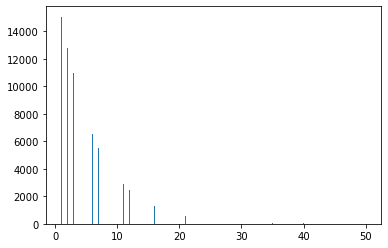

In [58]:
percent_5 = np.percentile(success, 5)
percent_25 = np.percentile(success, 25)
percent_50 = np.percentile(success, 50)
percent_75 = np.percentile(success, 75)
percent_95 = np.percentile(success, 95)

print(f"5% of users receive an elixir on their {percent_5} box")
print(f"25% of users receive an elixir on their {percent_25} box")
print(f"50% of users receive an elixir on their {percent_50} box")
print(f"75% of users receive an elixir on their {percent_75} box")
print(f"95% of users receive an elixir on their {percent_95} box")


**NOTE**: When your Jupyter notebook is open, double-click on this Markdown cell! You can delete this text and put your answer to the previous problem in here.

### Version 2

After a substantial update to the game, suppose every loot box can be opened to reveal *one of four different* items:
- magical elixir (occurs 1% of the time, most valuable)
- golden pendant (occurs 9% of the time, valuable)
- steel armor (occurs 30% of the time, semi-valuable)
- bronze coin (occurs 60% of the time, least valuable)

#### 6. Suppose you want repeat problem 5 above, but do that for the version 2 loot boxes so you can track how many loot boxes are needed to get each item? (e.g. You'd like to be able to say that on average it takes 10 trials to get a golden pendant, 3 trials to get steel armor, and so on.) What Python datatype is the best way to store this data? Why?

A Python dictionary would be best suited to store this date. The item would be the key, while the number of tries would be the value.
This would be easy to search and reference.

In [56]:
attempts2 = 10000

box_2_result = ["magical elixir", "golden pendant", "steel armor", "bronze coin"]
p_box_2 = [.01, .09, .3, .6]

def box_opener(item):
    if item in box_2_result:
        success = []
        for attempt in range(attempts2):
            box_count = 0 # set counter
            while True: # create loop to run until success
                open = np.random.choice(box_2_result, p = p_box_2) # open box
                box_count += 1 # increment open count
                if open == item: 
                    success.append(box_count)
                    break # breakout if success
    else:
        print(f"Item '{item}' not found, please try again.")
    return success

In [57]:
elixir_open = box_opener("magical elixir")
pendant_open = box_opener("golden pendant")
armor_open = box_opener("steel armor")
coin_open = box_opener("bronze coin")

print(np.mean(elixir_open))
print(np.mean(pendant_open))
print(np.mean(armor_open))
print(np.mean(coin_open))

100.3361
11.0952
3.3357
1.6784


#### 7. Suppose you and your boss want to measure whether "Version 2" is better than "Version 1." What metrics do you think are important to measure? (Your answers will vary here - use your judgment!)

- Measure whether there is more revenue generated by Version 2 of the loot box.